# Building CNN based on AlexNet Architecture

In [44]:
# Importing Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [45]:
h = 112
w = 112
c = 3

In [48]:
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(100,3, input_shape=(h,w,c), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(100,3, activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(100,3, activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 75, activation = 'relu'))
classifier.add(Dropout(0.4))
# classifier.add(BatchNormalization())
classifier.add(Dense(units = 50, activation = 'relu'))
classifier.add(Dropout(0.4))
# classifier.add(BatchNormalization())
classifier.add(Dense(units = 50, activation = 'relu'))
classifier.add(Dropout(0.2))
# classifier.add(BatchNormalization())
classifier.add(Dense(units = 10, activation = 'softmax'))
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 110, 110, 100)     2800      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 55, 55, 100)      0         
 g2D)                                                            
                                                                 
 batch_normalization_50 (Bat  (None, 55, 55, 100)      400       
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 53, 53, 100)       90100     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 26, 26, 100)      0         
 g2D)                                                            
                                                      

In [50]:
# Compiling the CNN
classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


# Compiling the CNN
# classifier.compile(optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.005),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [51]:
# image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
batch_size = 32

train_data_dir = r"Data/train"     # directory of training data

test_data_dir = r"Data/test"      # directory of test data

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(h, w),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(h, w),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 18210 images belonging to 10 classes.
Found 4552 images belonging to 10 classes.


In [56]:
for i in training_set.class_indices:
    print(i,":",training_set.class_indices[i])

Apple___Cedar_apple_rust : 0
Apple___healthy : 1
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 2
Corn_(maize)___healthy : 3
Grape___Esca_(Black_Measles) : 4
Grape___healthy : 5
Peach___Bacterial_spot : 6
Peach___healthy : 7
Potato___Early_blight : 8
Potato___healthy : 9


In [57]:
# checkpoint
modelpath = "model1.hdf5"
checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=training_set.samples//batch_size,
                         validation_data=test_set,
                         epochs=20,
                         validation_steps=test_set.samples//batch_size,
                         callbacks=callbacks_list)

Epoch 1/20
569/569 [==============================] - ETA: 0s - loss: 1.8107 - accuracy: 0.4152
Epoch 1: val_accuracy improved from -inf to 0.51915, saving model to model.hdf5
569/569 [==============================] - 519s 912ms/step - loss: 1.8107 - accuracy: 0.4152 - val_loss: 1.4460 - val_accuracy: 0.5191
Epoch 2/20
569/569 [==============================] - ETA: 0s - loss: 1.0161 - accuracy: 0.6687
Epoch 2: val_accuracy improved from 0.51915 to 0.70797, saving model to model.hdf5
569/569 [==============================] - 515s 905ms/step - loss: 1.0161 - accuracy: 0.6687 - val_loss: 1.2210 - val_accuracy: 0.7080
Epoch 3/20
569/569 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.7575
Epoch 3: val_accuracy improved from 0.70797 to 0.85871, saving model to model.hdf5
569/569 [==============================] - 515s 905ms/step - loss: 0.7626 - accuracy: 0.7575 - val_loss: 0.4700 - val_accuracy: 0.8587
Epoch 4/20
569/569 [==============================] - ETA: 0s

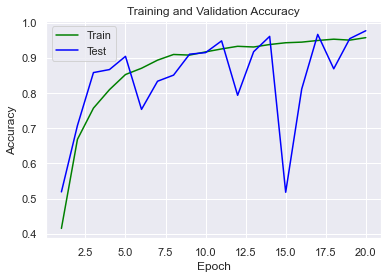

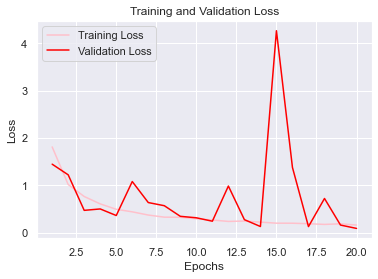

In [58]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
#saving model
filepath="fmodel.hdf5"
classifier.save(filepath)

In [18]:
from tensorflow.keras.models import load_model
fmodel = load_model("fmodel.hdf5")

In [19]:
results = fmodel.evaluate(test_set)
print('val loss:', results[0])
print('val acc:', results[1])

175/175 [==============================] - 8s 45ms/step - loss: 0.2219 - accuracy: 0.9244
val loss: 0.2219351977109909
val acc: 0.9244436621665955


In [59]:
from tensorflow.keras.models import load_model
model = load_model("model.hdf5")

In [61]:
results = model.evaluate(test_set)
print('val loss:', results[0])
print('val acc:', results[1]*100,"%")

143/143 [==============================] - 36s 252ms/step - loss: 0.0880 - accuracy: 0.9778
val loss: 0.08799121528863907
val acc: 97.78119325637817 %


['Potato___Early_blight', 'Corn_(maize)___healthy', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Grape___healthy', 'Grape___Esca_(Black_Measles)', 'Peach___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___healthy', 'Potato___healthy']


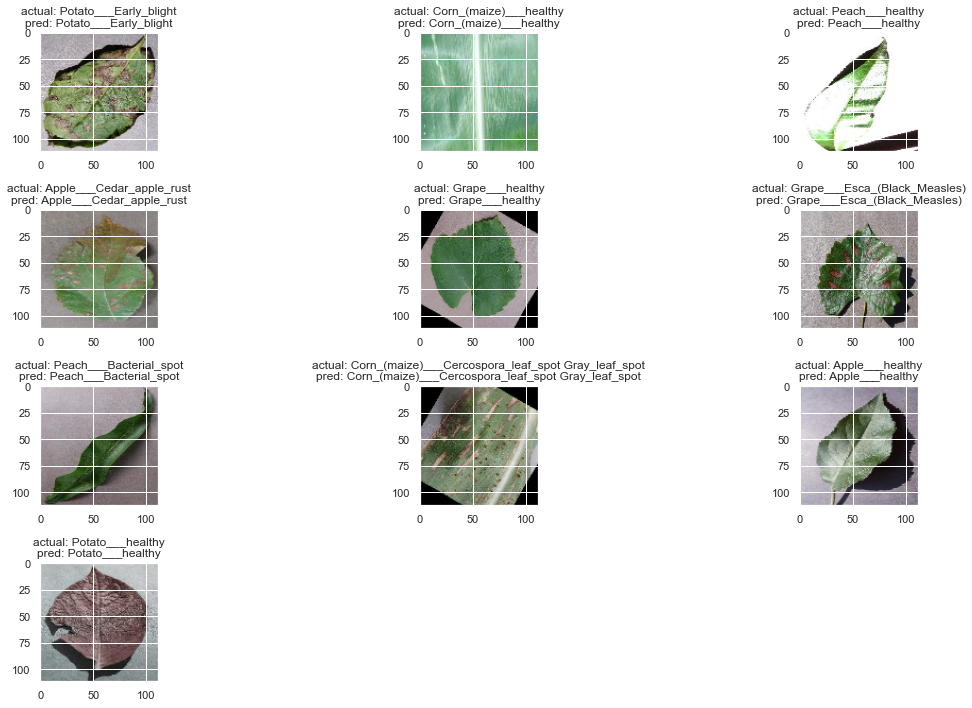

In [70]:
import cv2
import os
classes = list(dict(training_set.class_indices).keys())
im_add = r"Data/test" 
input_loc = os.listdir(im_add)
input_loc.remove(".DS_Store")
print(input_loc)
plt.figure(figsize=(16,10))
for j,i in enumerate(input_loc):
    im_a = os.path.join(im_add,i,os.listdir(os.path.join(im_add,i))[2])
    img = cv2.imread(im_a)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img/255
    img = cv2.resize(img,(h,w))
    img1 = img.reshape((1, h, w, 3))
    type_pred = model.predict(img1)
    plt.subplot(4,3,j+1)
    plt.imshow(img)
    plt.title(f'actual: {i}\npred: {classes[type_pred.argmax()]}')

plt.tight_layout()
plt.show()